In [ ]:
# We can improve our model by changing neuron numbers or
# By changning test size, making it smaller
# By changing length

In [149]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [150]:
df = pd.read_csv('Frozen_Dessert_Production.csv',index_col='DATE',parse_dates=True)

In [151]:
df.head()

,IPN31152N
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


In [152]:
df.columns=['Production']

In [153]:
df.head()

,Production
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


In [154]:
len(df)-test_length

558

In [155]:
test_length = 15
train_length = len(df)-test_length
train = df.iloc[:train_length]
test = df.iloc[-test_length:]

In [156]:
train

,Production
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636
...,...
2018-02-01,99.4899
2018-03-01,107.3152
2018-04-01,112.4309


In [157]:
test

,Production
DATE,
2018-07-01,117.2215
2018-08-01,112.6779
2018-09-01,103.3118
2018-10-01,92.1321
2018-11-01,82.4347
2018-12-01,76.7608
2019-01-01,86.9988
2019-02-01,98.1116
2019-03-01,116.1718


In [158]:
from sklearn.preprocessing import MinMaxScaler

In [159]:
scaler = MinMaxScaler()

In [160]:
scaler.fit(train)

MinMaxScaler()

In [161]:
trainScaled= scaler.transform(train)
testScaled= scaler.transform(test)

In [162]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [163]:
length = 12
generator = TimeseriesGenerator(trainScaled, trainScaled, length=length, batch_size=1)

In [164]:
# Model Creation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM

In [165]:
model = Sequential()

model.add(LSTM(200,
               input_shape=(length, n_features),activation='relu'))  # returns a sequence of vectors of dimension 32

#model.add(LSTM(50,
 #              input_shape=(length, n_features),activation='relu'))  # returns a sequence of vectors of dimension 32

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')


In [166]:
# Early Stopping and Validation
from tensorflow.keras.callbacks import EarlyStopping

In [167]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',patience=5)

In [168]:
validation_generator = TimeseriesGenerator(testScaled,testScaled, length=12, batch_size=1)

In [169]:
# fit model
model.fit_generator(generator,epochs=20,
                    validation_data=validation_generator,
                   callbacks=[early_stop])

Epoch 1/20


C:\Users\User\AppData\Local\Temp\ipykernel_13448\1350552164.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=20,


546/546 [==============================] - 4s 5ms/step - loss: 0.0191 - val_loss: 9.1698e-04
Epoch 2/20
546/546 [==============================] - 2s 4ms/step - loss: 0.0084 - val_loss: 0.0012
Epoch 3/20
546/546 [==============================] - 3s 5ms/step - loss: 0.0052 - val_loss: 0.0016
Epoch 4/20
546/546 [==============================] - 3s 6ms/step - loss: 0.0047 - val_loss: 0.0014
Epoch 5/20
546/546 [==============================] - 3s 5ms/step - loss: 0.0038 - val_loss: 0.0030
Epoch 6/20
546/546 [==============================] - 3s 5ms/step - loss: 0.0045 - val_loss: 0.0046


<AxesSubplot:>

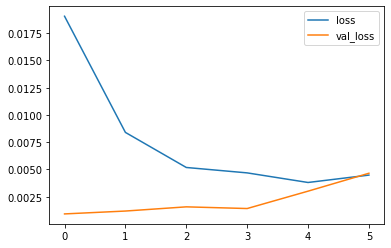

In [170]:
losses=pd.DataFrame(model.history.history)
losses.plot()

In [171]:
test

,Production
DATE,
2018-07-01,117.2215
2018-08-01,112.6779
2018-09-01,103.3118
2018-10-01,92.1321
2018-11-01,82.4347
2018-12-01,76.7608
2019-01-01,86.9988
2019-02-01,98.1116
2019-03-01,116.1718


In [172]:
test_predictions = []

first_eval_batch = trainScaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))
print(current_pred)

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    #print(i)
    #print(current_pred)
    
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

[0.32681373]
1/1 [==============================] - 0s 19ms/step


In [173]:
true_predictions = scaler.inverse_transform(test_predictions)

C:\Users\User\AppData\Local\Temp\ipykernel_13448\3954665995.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


<AxesSubplot:xlabel='DATE'>

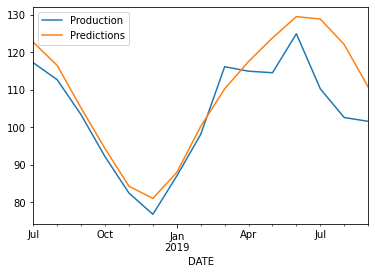

In [174]:
test['Predictions'] = true_predictions
test.plot()

In [179]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(test['Production'],test['Predictions']))

8.32265318969104